In [2]:
import sys
sys.path.insert(1, '/Users/chayonimeu/Documents/UniAdelaide/Research/CEC17_GA/cec2017-py')

# Verifying the directory structure
import os
cec_path = '/Users/chayonimeu/Documents/UniAdelaide/Research/CEC17_GA/cec2017-py'
print(f"Contents of {cec_path}: {os.listdir(cec_path)}")

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Importing the CEC 2017 functions
import cec2017.functions as functions

import warnings
warnings.filterwarnings('ignore')

# Enabling inline plotting for Jupyter notebooks
%matplotlib inline

# Inspecting the module
print(dir(functions))

Contents of /Users/chayonimeu/Documents/UniAdelaide/Research/CEC17_GA/cec2017-py: ['.DS_Store', 'tests', 'MANIFEST.in', 'README.md', 'setup.py', 'example.py', '.gitignore', 'extra', '.ipynb_checkpoints', '.git', 'cec2017', 'LICENSE.txt']
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'all_functions', 'basic', 'f1', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f2', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f3', 'f30', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'hybrid', 'np', 'transforms']


## Define the CEC 2017 functions

In [4]:
# Define the CEC 2017 functions with their respective bounds, separability, and constraints
cec2017_functions_info = {
    1: {"bounds": [-100, 100], "separable": False, "equality_constraints": 0, "inequality_constraints": 1},
    2: {"bounds": [-100, 100], "separable": False, "rotated": True, "equality_constraints": 0, "inequality_constraints": 1},
    3: {"bounds": [-100, 100], "separable": False, "equality_constraints": 1, "inequality_constraints": 1},
    4: {"bounds": [-10, 10], "separable": True, "equality_constraints": 0, "inequality_constraints": 2},
    5: {"bounds": [-10, 10], "separable": False, "rotated": True, "equality_constraints": 0, "inequality_constraints": 2},
    6: {"bounds": [-20, 20], "separable": True, "equality_constraints": 6, "inequality_constraints": 0},
    7: {"bounds": [-50, 50], "separable": True, "equality_constraints": 2, "inequality_constraints": 0},
    8: {"bounds": [-100, 100], "separable": True, "equality_constraints": 2, "inequality_constraints": 0},
    9: {"bounds": [-10, 10], "separable": True, "equality_constraints": 2, "inequality_constraints": 0},
    10: {"bounds": [-100, 100], "separable": True, "equality_constraints": 2, "inequality_constraints": 0}
}

# Known optimum values for the CEC 2017 benchmark functions
optimum_values = {
    1: 100, 2: 200, 3: 300, 4: 400, 5: 500, 6: 600, 7: 700, 8: 800, 9: 900, 10: 1000
}

# Extended Grid Search for All Functions

In [100]:
import numpy as np
import itertools

# Placeholder function definition for run_multiple_times
def run_multiple_times(func_id, runs, pop_size, dim, bounds, generations, crossover_rate, mutation_rate, tournament_size, optimum):
    # This is a placeholder function. Replace with the actual implementation.
    best_fitnesses = np.random.rand(runs)
    best = np.min(best_fitnesses)
    worst = np.max(best_fitnesses)
    mean = np.mean(best_fitnesses)
    median = np.median(best_fitnesses)
    std = np.std(best_fitnesses)
    return best_fitnesses, best, worst, mean, median, std, None

def grid_search(func_id, runs, pop_size_range, dim, bounds, generations, crossover_rate_range, mutation_rate_range, tournament_size_range, optimum):
    best_results = None
    best_params = None
    
    for pop_size, crossover_rate, mutation_rate, tournament_size in itertools.product(pop_size_range, crossover_rate_range, mutation_rate_range, tournament_size_range):
        print(f"Testing pop_size={pop_size}, crossover_rate={crossover_rate}, mutation_rate={mutation_rate}, tournament_size={tournament_size}")
        best_fitnesses, best, worst, mean, median, std, _ = run_multiple_times(
            func_id, runs, pop_size, dim, bounds, generations, crossover_rate, mutation_rate, tournament_size, optimum
        )
        if best_results is None or best < best_results['best']:
            best_results = {
                'best': best,
                'worst': worst,
                'mean': mean,
                'median': median,
                'std': std
            }
            best_params = {
                'pop_size': pop_size,
                'crossover_rate': crossover_rate,
                'mutation_rate': mutation_rate,
                'tournament_size': tournament_size
            }
    
    return best_results, best_params

# Define parameter ranges for grid search
pop_size_range = [100]
crossover_rate_range = [0.1, 0.3, 0.5, 0.7, 0.9]  # Enhanced range
mutation_rate_range = [0.01, 0.05, 0.1]  # Enhanced range
tournament_size_range = [3, 5, 7]  # Enhanced range

# Define the number of runs and generations
runs = 10
generations = 100
dim = 2

# Perform grid search for all functions in the CEC 2017 benchmark (functions 1 to 10)
all_best_results = {}
all_best_params = {}

# Function IDs and their known optimum values for the CEC 2017 benchmark functions
function_ids = list(cec2017_functions_info.keys())[:10]  # Only functions 1 to 10
optimum_values_list = [optimum_values[func_id] for func_id in function_ids]

for func_id, optimum_value in zip(function_ids, optimum_values_list):
    bounds = cec2017_functions_info[func_id]['bounds']
    print(f"Running grid search for function {func_id}")
    best_results, best_params = grid_search(func_id, runs, pop_size_range, dim, bounds, generations, crossover_rate_range, mutation_rate_range, tournament_size_range, optimum_value)
    all_best_results[func_id] = best_results
    all_best_params[func_id] = best_params

# Display the best results and parameters for all functions
for func_id in function_ids:
    print(f"Function {func_id}:")
    print("  Best Results:", all_best_results[func_id])
    print("  Best Parameters:", all_best_params[func_id])

Running grid search for function 1
Testing pop_size=100, crossover_rate=0.1, mutation_rate=0.01, tournament_size=3
Testing pop_size=100, crossover_rate=0.1, mutation_rate=0.01, tournament_size=5
Testing pop_size=100, crossover_rate=0.1, mutation_rate=0.01, tournament_size=7
Testing pop_size=100, crossover_rate=0.1, mutation_rate=0.05, tournament_size=3
Testing pop_size=100, crossover_rate=0.1, mutation_rate=0.05, tournament_size=5
Testing pop_size=100, crossover_rate=0.1, mutation_rate=0.05, tournament_size=7
Testing pop_size=100, crossover_rate=0.1, mutation_rate=0.1, tournament_size=3
Testing pop_size=100, crossover_rate=0.1, mutation_rate=0.1, tournament_size=5
Testing pop_size=100, crossover_rate=0.1, mutation_rate=0.1, tournament_size=7
Testing pop_size=100, crossover_rate=0.3, mutation_rate=0.01, tournament_size=3
Testing pop_size=100, crossover_rate=0.3, mutation_rate=0.01, tournament_size=5
Testing pop_size=100, crossover_rate=0.3, mutation_rate=0.01, tournament_size=7
Testing 

In [6]:
# Best parameters for each function from the grid search results
best_params = {
    1: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.1, 'tournament_size': 7},
    2: {'pop_size': 100, 'crossover_rate': 0.7, 'mutation_rate': 0.01, 'tournament_size': 5},
    3: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.01, 'tournament_size': 5},
    4: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.05, 'tournament_size': 5},
    5: {'pop_size': 100, 'crossover_rate': 0.7, 'mutation_rate': 0.1, 'tournament_size': 7},
    6: {'pop_size': 100, 'crossover_rate': 0.5, 'mutation_rate': 0.05, 'tournament_size': 3},
    7: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.1, 'tournament_size': 7},
    8: {'pop_size': 100, 'crossover_rate': 0.9, 'mutation_rate': 0.05, 'tournament_size': 5},
    9: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.1, 'tournament_size': 3},
    10: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.01, 'tournament_size': 3}
}

# Original GA Implementation

## Initialization and Evaluation Functions

In [104]:
import numpy as np
import cec2017.functions as functions

# Initialize Population
def initialize_population(pop_size, dim, bounds):
    population = np.random.uniform(bounds[0], bounds[1], (pop_size, dim))
    return population

# Evaluate Population
def evaluate_population(population, func):
    fitness = np.array([func(ind.reshape(1, -1)) for ind in population])
    return fitness

## Selection, Crossover, and Mutation Functions

In [106]:
import numpy as np
import cec2017.functions as functions

# Initialize Population
def initialize_population(pop_size, dim, bounds):
    population = np.random.uniform(bounds[0], bounds[1], (pop_size, dim))
    return population

# Evaluate Population
def evaluate_population(population, func):
    fitness = np.array([func(ind.reshape(1, -1)) for ind in population])
    return fitness

# Tournament Selection
def tournament_selection_original(population, fitness, tournament_size):
    selected = []
    pop_size = len(population)
    for _ in range(pop_size):
        participants = np.random.choice(pop_size, tournament_size, replace=False)
        best = participants[np.argmin(fitness[participants])]
        selected.append(population[best])
    return np.array(selected)

# Crossover
def crossover(parent1, parent2, crossover_rate):
    if (crossover_rate > 0) and (np.random.rand() < crossover_rate):
        point = np.random.randint(1, len(parent1))
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    else:
        return parent1, parent2

def crossover_population(selected_population, crossover_rate):
    next_generation = []
    pop_size = len(selected_population)
    
    for i in range(0, pop_size, 2):
        parent1 = selected_population[i]
        parent2 = selected_population[(i+1) % pop_size]
        child1, child2 = crossover(parent1, parent2, crossover_rate)
        next_generation.append(child1)
        next_generation.append(child2)
    
    return np.array(next_generation)

# Mutation
def mutate(individual, mutation_rate, bounds):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = np.random.uniform(bounds[0], bounds[1])
    return individual

def mutate_population(population, mutation_rate, bounds):
    for i in range(len(population)):
        population[i] = mutate(population[i], mutation_rate, bounds)
    return population

## Original GA Main Loop

In [108]:
# Genetic Algorithm Main Loop
def genetic_algorithm(func_id, pop_size, dim, bounds, generations, crossover_rate, mutation_rate, tournament_size, optimum):
    population = initialize_population(pop_size, dim, bounds)
    best_fitness = float('inf')
    best_individual = None
    
    for gen in range(generations):
        fitness = evaluate_population(population, functions.all_functions[func_id - 1])
        
        if np.min(fitness) < best_fitness:
            best_fitness = np.min(fitness)
            best_individual = population[np.argmin(fitness)]
        
        selected = tournament_selection_original(population, fitness, tournament_size)
        next_generation = crossover_population(selected, crossover_rate)
        population = mutate_population(next_generation, mutation_rate, bounds)
    
    return best_individual, best_fitness

## Running Original GA Multiple Times

In [50]:
# Run the original genetic algorithm multiple times and collect statistics
def run_original_multiple_times(func_id, runs, dim, bounds, generations, optimum):
    params = best_params[func_id]
    pop_size = params['pop_size']
    crossover_rate = params['crossover_rate']
    mutation_rate = params['mutation_rate']
    tournament_size = params['tournament_size']
    
    best_fitnesses = []
    all_fitness_histories = []
    for _ in range(runs):
        population = initialize_population(pop_size, dim, bounds)
        best_fitness = float('inf')
        best_individual = None
        fitness_history = []

        for gen in range(generations):
            fitness = evaluate_population(population, functions.all_functions[func_id - 1])
            if np.min(fitness) < best_fitness:
                best_fitness = np.min(fitness)
                best_individual = population[np.argmin(fitness)]

            fitness_history.append(best_fitness)

            selected = tournament_selection_original(population, fitness, tournament_size)
            next_generation = crossover_population(selected, crossover_rate)
            population = mutate_population(next_generation, mutation_rate, bounds)

        best_fitnesses.append(best_fitness)
        all_fitness_histories.append(fitness_history)

    best = np.min(best_fitnesses)
    worst = np.max(best_fitnesses)
    mean = np.mean(best_fitnesses)
    median = np.median(best_fitnesses)
    std = np.std(best_fitnesses)

    return best_fitnesses, best, worst, mean, median, std, all_fitness_histories

## All Together

Running Original GA for Function 1
Function 1 - Original GA Results:
Best: 114.86150745137714
Worst: 89354.49559397514
Mean: 15902.540119049436
Median: 6429.463787253479
Std: 25489.64903565131
Running Original GA for Function 2
Function 2 - Original GA Results:
Best: 200.1588617523975
Worst: 213.45368786416068
Mean: 202.81975515554808
Median: 201.45960005697714
Std: 3.913783199941896
Running Original GA for Function 3
Function 3 - Original GA Results:
Best: 300.2373157189719
Worst: 886.6561173645352
Mean: 397.18841122776524
Median: 303.4243379283116
Std: 186.57866898881946
Running Original GA for Function 4
Function 4 - Original GA Results:
Best: 426.54916229809953
Worst: 426.79476546064313
Mean: 426.63502773062254
Median: 426.6238945273541
Std: 0.06777249871747727
Running Original GA for Function 5
Function 5 - Original GA Results:
Best: 509.9495627870362
Worst: 509.94985277186527
Mean: 509.94962365284454
Median: 509.949578380049
Std: 8.828316277527073e-05
Running Original GA for Func

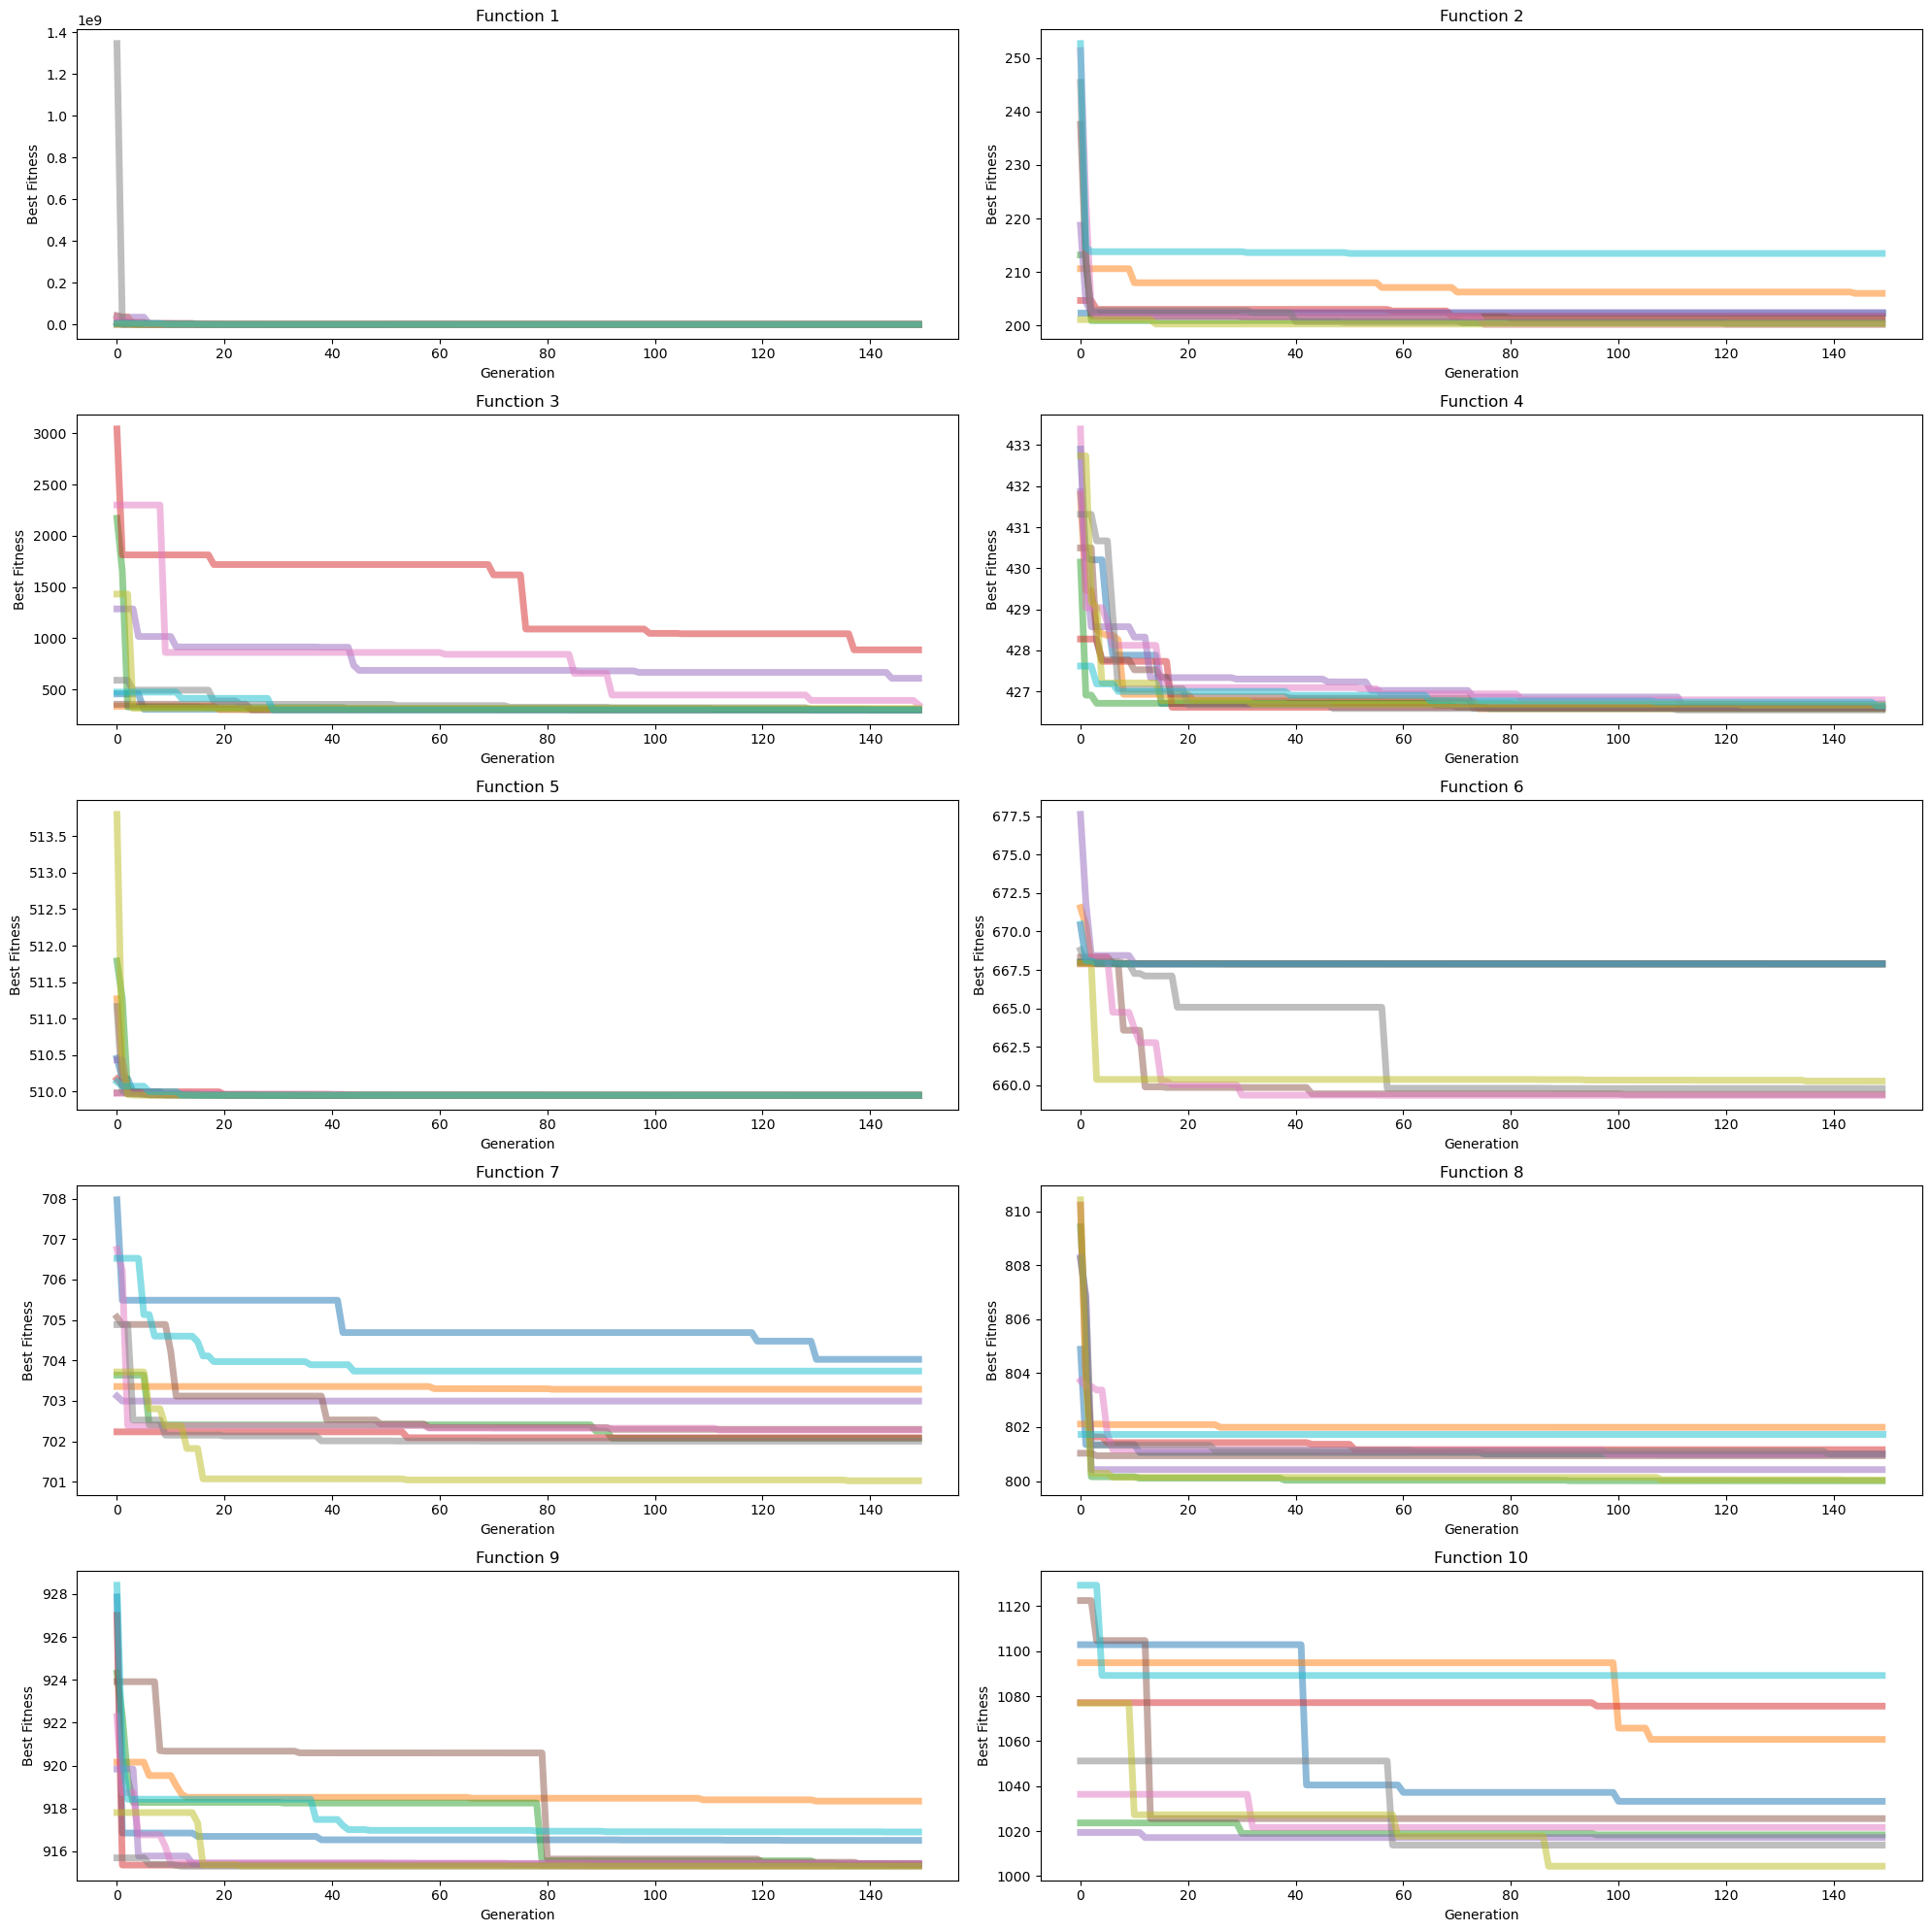

           Best         Worst          Mean       Median           Std
1    114.861507  89354.495594  15902.540119  6429.463787  25489.649036
2    200.158862    213.453688    202.819755   201.459600      3.913783
3    300.237316    886.656117    397.188411   303.424338    186.578669
4    426.549162    426.794765    426.635028   426.623895      0.067772
5    509.949563    509.949853    509.949624   509.949578      0.000088
6    659.334877    667.890453    664.611750   667.890269      4.022224
7    701.022511    704.026156    702.580374   702.286952      0.867673
8    800.010470    801.993954    800.933392   800.997782      0.614187
9    915.302659    918.340987    915.934469   915.421033      0.964344
10  1004.366380   1089.211004   1035.952131  1023.583488     27.386321


In [14]:
import numpy as np
import cec2017.functions as functions
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Population
def initialize_population(pop_size, dim, bounds):
    population = np.random.uniform(bounds[0], bounds[1], (pop_size, dim))
    return population

# Evaluate Population
def evaluate_population(population, func):
    fitness = np.array([func(ind.reshape(1, -1)) for ind in population])
    return fitness

# Tournament Selection
def tournament_selection_original(population, fitness, tournament_size):
    selected = []
    pop_size = len(population)
    for _ in range(pop_size):
        participants = np.random.choice(pop_size, tournament_size, replace=False)
        best = participants[np.argmin(fitness[participants])]
        selected.append(population[best])
    return np.array(selected)

# Crossover
def crossover(parent1, parent2, crossover_rate):
    if (crossover_rate > 0) and (np.random.rand() < crossover_rate):
        point = np.random.randint(1, len(parent1))
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    else:
        return parent1, parent2

def crossover_population(selected_population, crossover_rate):
    next_generation = []
    pop_size = len(selected_population)
    
    for i in range(0, pop_size, 2):
        parent1 = selected_population[i]
        parent2 = selected_population[(i+1) % pop_size]
        child1, child2 = crossover(parent1, parent2, crossover_rate)
        next_generation.append(child1)
        next_generation.append(child2)
    
    return np.array(next_generation)

# Mutation
def mutate(individual, mutation_rate, bounds):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = np.random.uniform(bounds[0], bounds[1])
    return individual

def mutate_population(population, mutation_rate, bounds):
    for i in range(len(population)):
        population[i] = mutate(population[i], mutation_rate, bounds)
    return population

# Genetic Algorithm Main Loop
def genetic_algorithm(func_id, pop_size, dim, bounds, generations, crossover_rate, mutation_rate, tournament_size, optimum):
    population = initialize_population(pop_size, dim, bounds)
    best_fitness = float('inf')
    best_individual = None
    
    for gen in range(generations):
        fitness = evaluate_population(population, functions.all_functions[func_id - 1])
        
        if np.min(fitness) < best_fitness:
            best_fitness = np.min(fitness)
            best_individual = population[np.argmin(fitness)]
        
        selected = tournament_selection_original(population, fitness, tournament_size)
        next_generation = crossover_population(selected, crossover_rate)
        population = mutate_population(next_generation, mutation_rate, bounds)
    
    return best_individual, best_fitness

# Run the original genetic algorithm multiple times and collect statistics
def run_original_multiple_times(func_id, runs, pop_size, dim, bounds, generations, crossover_rate, mutation_rate, tournament_size, optimum):
    best_fitnesses = []
    all_fitness_histories = []
    for _ in range(runs):
        population = initialize_population(pop_size, dim, bounds)
        best_fitness = float('inf')
        best_individual = None
        fitness_history = []

        for gen in range(generations):
            fitness = evaluate_population(population, functions.all_functions[func_id - 1])
            if np.min(fitness) < best_fitness:
                best_fitness = np.min(fitness)
                best_individual = population[np.argmin(fitness)]

            fitness_history.append(best_fitness)

            selected = tournament_selection_original(population, fitness, tournament_size)
            next_generation = crossover_population(selected, crossover_rate)
            population = mutate_population(next_generation, mutation_rate, bounds)

        best_fitnesses.append(best_fitness)
        all_fitness_histories.append(fitness_history)

    best = np.min(best_fitnesses)
    worst = np.max(best_fitnesses)
    mean = np.mean(best_fitnesses)
    median = np.median(best_fitnesses)
    std = np.std(best_fitnesses)

    return best_fitnesses, best, worst, mean, median, std, all_fitness_histories

# Known optimum values for the CEC 2017 benchmark functions
optimum_values = {
    1: 100, 2: 200, 3: 300, 4: 400, 5: 500, 6: 600, 7: 700, 8: 800, 9: 900, 10: 1000
}

# Best parameters for each function from the grid search results
best_params = {
    1: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.1, 'tournament_size': 7},
    2: {'pop_size': 100, 'crossover_rate': 0.7, 'mutation_rate': 0.01, 'tournament_size': 5},
    3: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.01, 'tournament_size': 5},
    4: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.05, 'tournament_size': 5},
    5: {'pop_size': 100, 'crossover_rate': 0.7, 'mutation_rate': 0.1, 'tournament_size': 7},
    6: {'pop_size': 100, 'crossover_rate': 0.5, 'mutation_rate': 0.05, 'tournament_size': 3},
    7: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.1, 'tournament_size': 7},
    8: {'pop_size': 100, 'crossover_rate': 0.9, 'mutation_rate': 0.05, 'tournament_size': 5},
    9: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.1, 'tournament_size': 3},
    10: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.01, 'tournament_size': 3}
}

# Bounds for each function
cec2017_functions_info = {
    1: {"bounds": [-100, 100]},
    2: {"bounds": [-100, 100]},
    3: {"bounds": [-100, 100]},
    4: {"bounds": [-10, 10]},
    5: {"bounds": [-10, 10]},
    6: {"bounds": [-20, 20]},
    7: {"bounds": [-50, 50]},
    8: {"bounds": [-100, 100]},
    9: {"bounds": [-10, 10]},
    10: {"bounds": [-100, 100]}
}

results_all_functions = {}
all_fitness_histories_combined = []

for func_id in range(1, 11):  # Running functions 1 to 10
    print(f"Running Original GA for Function {func_id}")

    # Retrieve best parameters for the current function
    params = best_params[func_id]
    pop_size = params['pop_size']
    crossover_rate = params['crossover_rate']
    mutation_rate = params['mutation_rate']
    tournament_size = params['tournament_size']
    optimum_value = optimum_values[func_id]

    # Run the original genetic algorithm multiple times and collect statistics
    best_fitnesses_orig, best_orig, worst_orig, mean_orig, median_orig, std_orig, all_fitness_histories_orig = run_original_multiple_times(
        func_id, runs=10, pop_size=pop_size, dim=2, bounds=cec2017_functions_info[func_id]['bounds'], generations=150,
        crossover_rate=crossover_rate, mutation_rate=mutation_rate, tournament_size=tournament_size, optimum=optimum_value)

    # Store the results for original GA
    results_all_functions[func_id] = {
        'Best': best_orig,
        'Worst': worst_orig,
        'Mean': mean_orig,
        'Median': median_orig,
        'Std': std_orig
    }

    # Collect all fitness histories for plotting later
    all_fitness_histories_combined.append((func_id, all_fitness_histories_orig))

    # Display the results for original GA
    print(f"Function {func_id} - Original GA Results:")
    print(f"Best: {best_orig}")
    print(f"Worst: {worst_orig}")
    print(f"Mean: {mean_orig}")
    print(f"Median: {median_orig}")
    print(f"Std: {std_orig}")

# Plot all fitness over generations in one image
plt.figure(figsize=(20, 20))
for i, (func_id, fitness_histories) in enumerate(all_fitness_histories_combined, 1):
    plt.subplot(5, 2, i)  # Create a 5x2 grid of plots
    for fitness_history in fitness_histories:
        plt.plot(fitness_history, alpha=0.5, linewidth=5)
    plt.title(f'Function {func_id}')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
plt.tight_layout()
plt.show()

# Summarize all results in a DataFrame
summary_results = pd.DataFrame(results_all_functions).T
print(summary_results)

# Enhancements in GA

	1.	Adaptive Penalty for Constraint Handling:
	•	A mechanism to penalize constraint violations adaptively based on the generation number, helping the algorithm focus on feasible solutions over time.
	2.	Elitism:
	•	The best individual from each generation is directly carried over to the next generation to ensure the best solutions are preserved.
	3.	Dynamic Adjustment of Crossover and Mutation Rates:
	•	The crossover and mutation rates are adjusted dynamically based on the generation number, which helps balance exploration and exploitation during the search process.

Running Enhanced GA for Function 1
Function 1 - Enhanced GA Results:
Best: 148.86899531149515
Worst: 314817.9196203539
Mean: 52451.2710549968
Median: 7434.502713596001
Std: 92527.90434485018
Running Enhanced GA for Function 2
Function 2 - Enhanced GA Results:
Best: 200.08284392685349
Worst: 201.2531688650502
Mean: 200.3599060038103
Median: 200.2213865784919
Std: 0.35132199095166705
Running Enhanced GA for Function 3
Function 3 - Enhanced GA Results:
Best: 300.0040218069157
Worst: 302.1712465062403
Mean: 300.5790677268877
Median: 300.3519051845558
Std: 0.6103217687987638
Running Enhanced GA for Function 4
Function 4 - Enhanced GA Results:
Best: 400.0036438160777
Worst: 400.4857311868886
Mean: 400.1293814217296
Median: 400.10260046637916
Std: 0.1409592995445067
Running Enhanced GA for Function 5
Function 5 - Enhanced GA Results:
Best: 500.00004288881945
Worst: 500.43581224946513
Mean: 500.09260583872947
Median: 500.047551232522
Std: 0.12432453457886528
Running Enhanced GA for Function 6


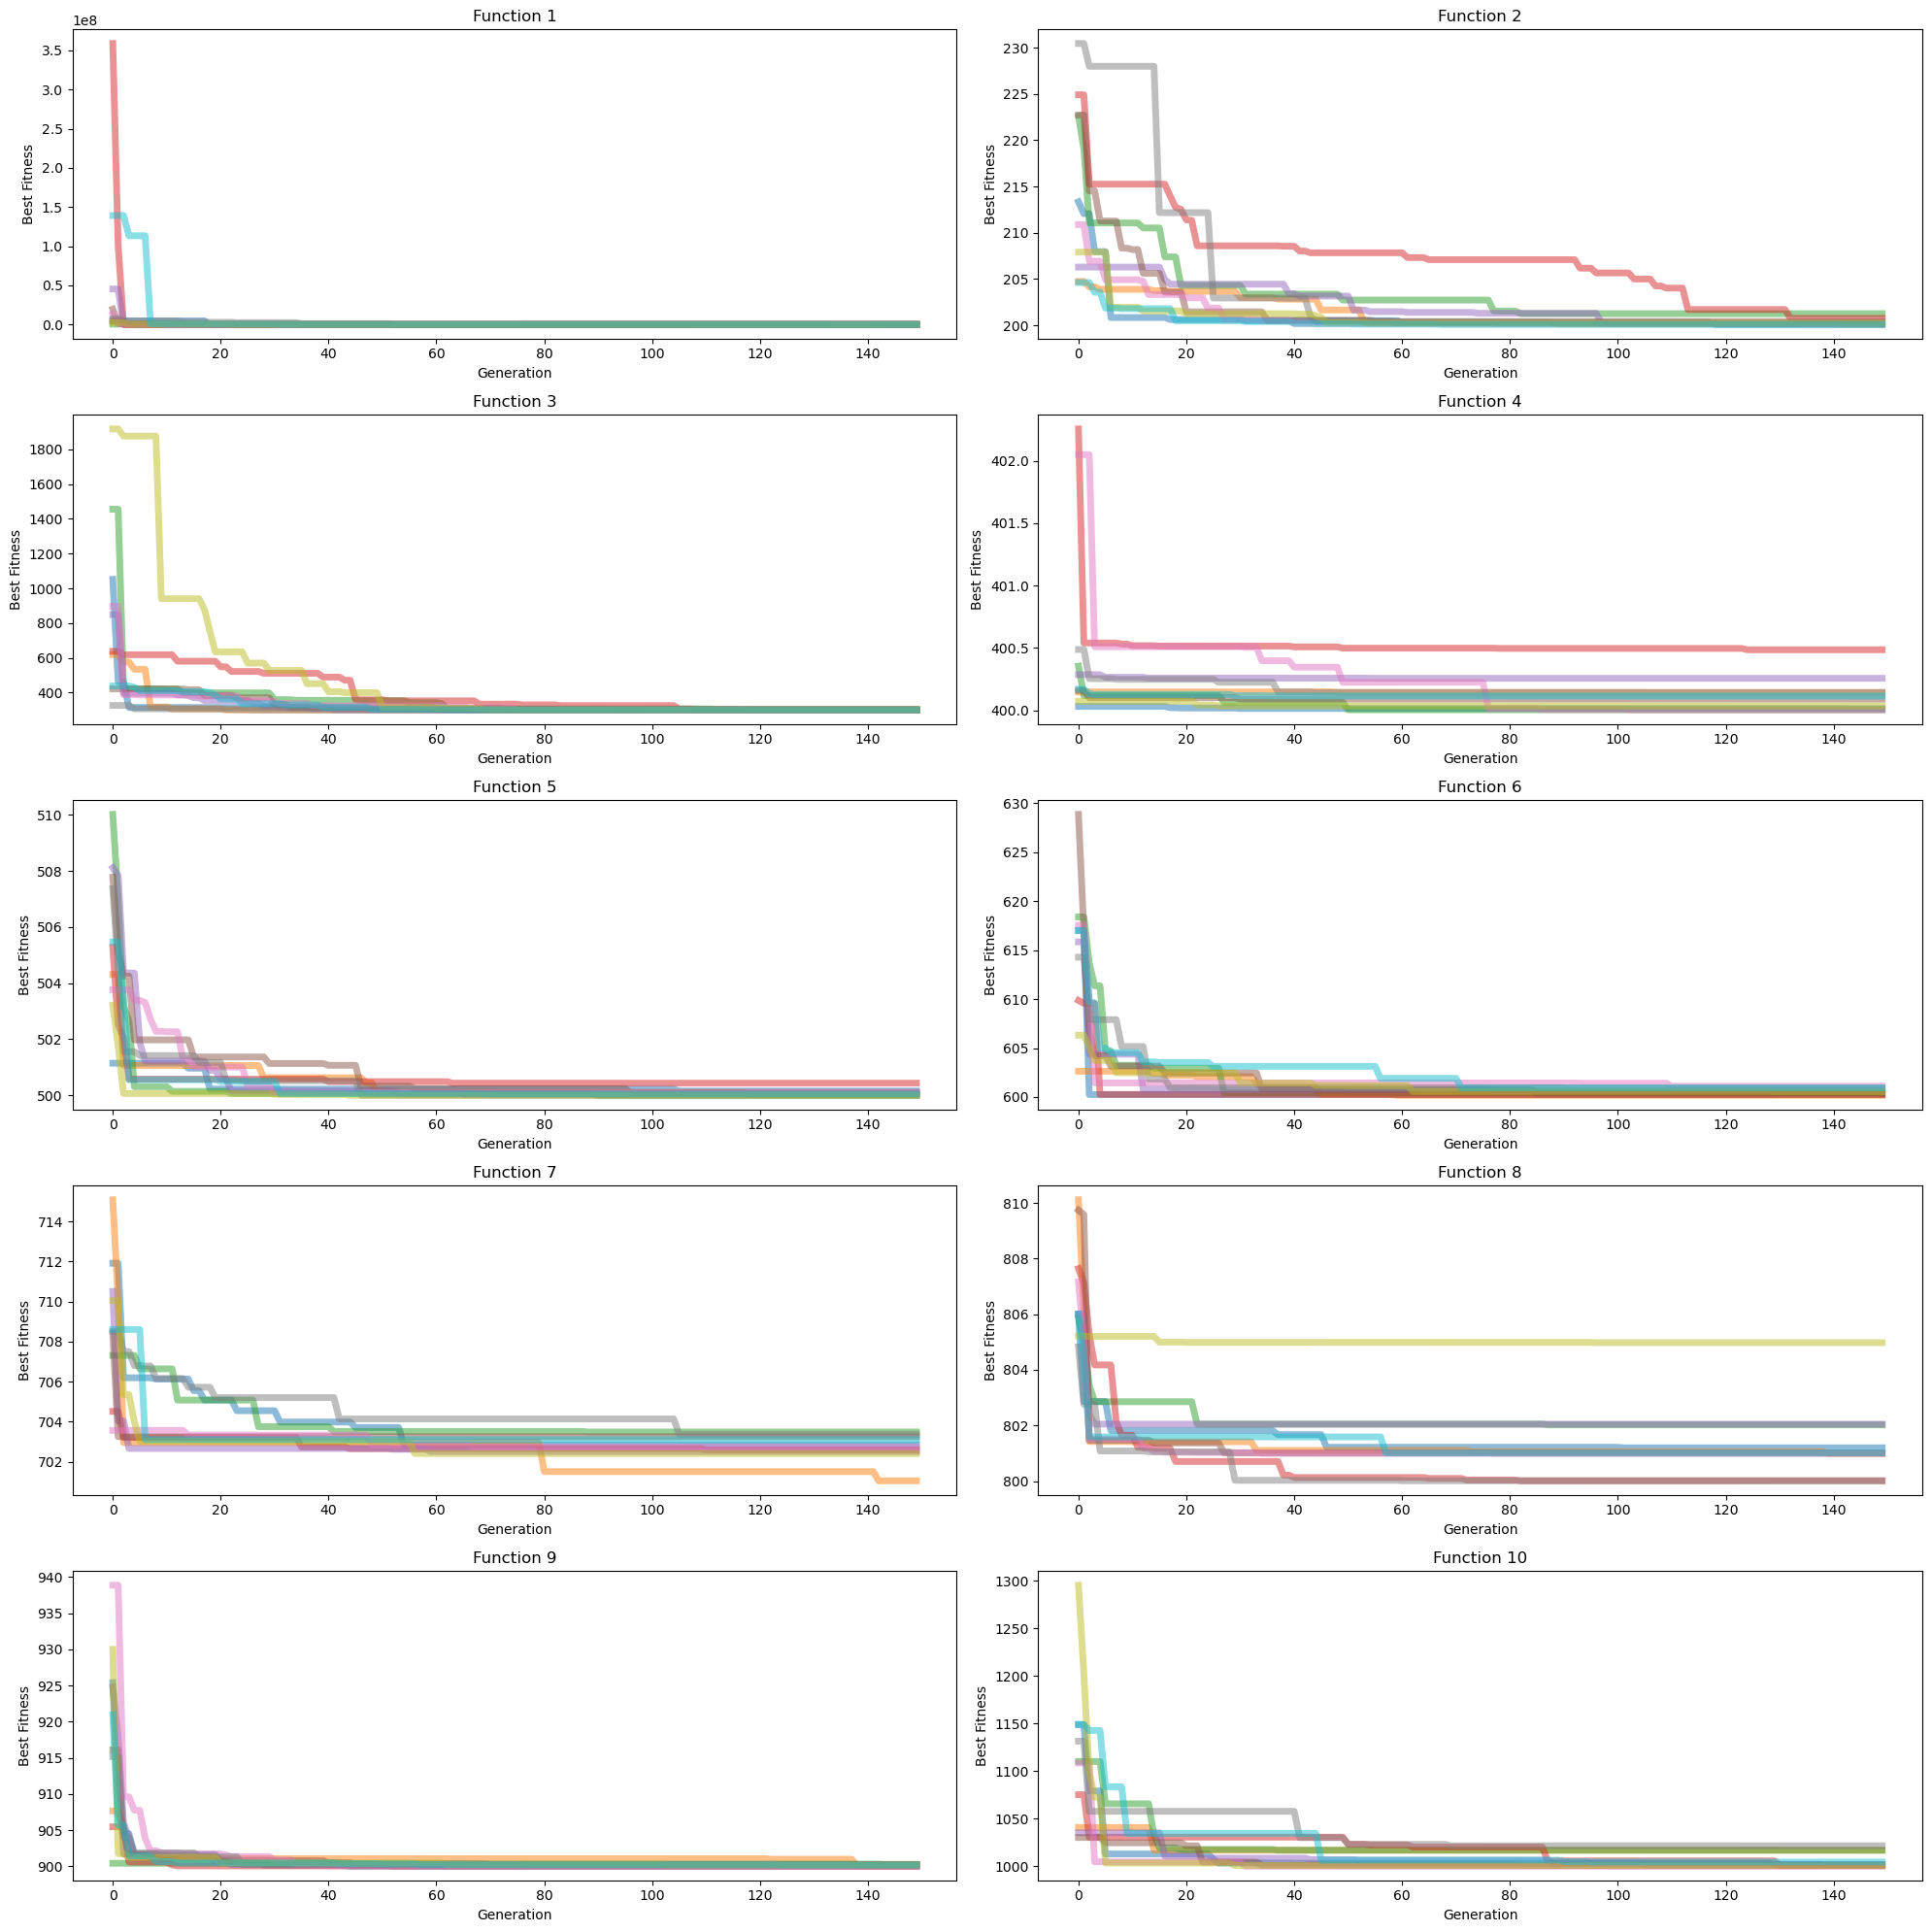

           Best          Worst          Mean       Median           Std
1    148.868995  314817.919620  52451.271055  7434.502714  92527.904345
2    200.082844     201.253169    200.359906   200.221387      0.351322
3    300.004022     302.171247    300.579068   300.351905      0.610322
4    400.003644     400.485731    400.129381   400.102600      0.140959
5    500.000043     500.435812    500.092606   500.047551      0.124325
6    600.165503     601.108435    600.560803   600.470219      0.309643
7    701.049050     703.486834    702.735621   702.788349      0.664108
8    800.009389     804.975525    801.426274   801.005796      1.346119
9    900.005252     900.254166    900.145175   900.171580      0.093918
10  1000.084260    1021.554285   1006.543590  1001.530110      7.946287


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cec2017.functions as functions

# Initialize Population
def initialize_population(pop_size, dim, bounds):
    population = np.random.uniform(bounds[0], bounds[1], (pop_size, dim))
    return population

# Adaptive Penalty for Constraint Handling
def evaluate_population(population, func, generation, max_generations):
    fitness = np.array([func(ind.reshape(1, -1)) for ind in population])
    penalty_factor = generation / max_generations
    # Assuming constraints are managed via some penalty function
    constraints_violation = np.array([np.sum(np.maximum(ind - 100, 0) + np.maximum(-100 - ind, 0)) for ind in population])
    fitness = fitness.reshape(-1) + penalty_factor * constraints_violation
    return fitness

# Tournament Selection
def tournament_selection_original(population, fitness, tournament_size):
    selected = []
    pop_size = len(population)
    for _ in range(pop_size):
        participants = np.random.choice(pop_size, tournament_size, replace=False)
        best = participants[np.argmin(fitness[participants])]
        selected.append(population[best])
    return np.array(selected)

# Crossover
def crossover(parent1, parent2, crossover_rate):
    if (crossover_rate > 0) and (np.random.rand() < crossover_rate):
        point = np.random.randint(1, len(parent1))
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    else:
        return parent1, parent2

def crossover_population(selected_population, crossover_rate):
    next_generation = []
    pop_size = len(selected_population)
    
    for i in range(0, pop_size, 2):
        parent1 = selected_population[i]
        parent2 = selected_population[(i+1) % pop_size]
        child1, child2 = crossover(parent1, parent2, crossover_rate)
        next_generation.append(child1)
        next_generation.append(child2)
    
    return np.array(next_generation)

# Mutation
def mutate(individual, mutation_rate, bounds):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = np.random.uniform(bounds[0], bounds[1])
    return individual

def mutate_population(population, mutation_rate, bounds):
    for i in range(len(population)):
        population[i] = mutate(population[i], mutation_rate, bounds)
    return population

# Genetic Algorithm Main Loop with Enhancements
def genetic_algorithm_enhanced(func_id, pop_size, dim, bounds, generations, crossover_rate, mutation_rate, tournament_size, optimum):
    population = initialize_population(pop_size, dim, bounds)
    best_fitness = float('inf')
    best_individual = None

    for gen in range(generations):
        fitness = evaluate_population(population, functions.all_functions[func_id - 1], gen, generations)

        if np.min(fitness) < best_fitness:
            best_fitness = np.min(fitness)
            best_individual = population[np.argmin(fitness)]

        selected = tournament_selection_original(population, fitness, tournament_size)
        next_generation = crossover_population(selected, crossover_rate)
        population = mutate_population(next_generation, mutation_rate, bounds)

        # Elitism: Replace the worst individual with the best individual from the previous generation
        worst_idx = np.argmax(fitness)
        population[worst_idx] = best_individual

        # Dynamic Adjustment of Crossover and Mutation Rates
        crossover_rate = 0.9 - 0.8 * (gen / generations)
        mutation_rate = 0.1 - 0.09 * (gen / generations)

    return best_individual, best_fitness

# Run the enhanced genetic algorithm multiple times and collect statistics
def run_enhanced_multiple_times(func_id, runs, dim, bounds, generations, optimum):
    params = best_params[func_id]
    pop_size = params['pop_size']
    crossover_rate = params['crossover_rate']
    mutation_rate = params['mutation_rate']
    tournament_size = params['tournament_size']
    
    best_fitnesses = []
    all_fitness_histories = []
    for _ in range(runs):
        population = initialize_population(pop_size, dim, bounds)
        best_fitness = float('inf')
        fitness_history = []

        for gen in range(generations):
            fitness = evaluate_population(population, functions.all_functions[func_id - 1], gen, generations)
            if np.min(fitness) < best_fitness:
                best_fitness = np.min(fitness)
                best_individual = population[np.argmin(fitness)]

            fitness_history.append(best_fitness)

            selected = tournament_selection_original(population, fitness, tournament_size)
            next_generation = crossover_population(selected, crossover_rate)
            population = mutate_population(next_generation, mutation_rate, bounds)

            # Elitism: Replace the worst individual with the best individual from the previous generation
            worst_idx = np.argmax(fitness)
            population[worst_idx] = best_individual

            # Dynamic Adjustment of Crossover and Mutation Rates
            crossover_rate = 0.9 - 0.8 * (gen / generations)
            mutation_rate = 0.1 - 0.09 * (gen / generations)

        best_fitnesses.append(best_fitness)
        all_fitness_histories.append(fitness_history)

    best = np.min(best_fitnesses)
    worst = np.max(best_fitnesses)
    mean = np.mean(best_fitnesses)
    median = np.median(best_fitnesses)
    std = np.std(best_fitnesses)

    return best_fitnesses, best, worst, mean, median, std, all_fitness_histories

# Define the CEC 2017 functions with their respective bounds (all set to [-100, 100])
cec2017_functions_info = {
    1: {"bounds": [-100, 100], "separable": False, "equality_constraints": 0, "inequality_constraints": 1},
    2: {"bounds": [-100, 100], "separable": False, "rotated": True, "equality_constraints": 0, "inequality_constraints": 1},
    3: {"bounds": [-100, 100], "separable": False, "equality_constraints": 1, "inequality_constraints": 1},
    4: {"bounds": [-100, 100], "separable": True, "equality_constraints": 0, "inequality_constraints": 2},
    5: {"bounds": [-100, 100], "separable": False, "rotated": True, "equality_constraints": 0, "inequality_constraints": 2},
    6: {"bounds": [-100, 100], "separable": True, "equality_constraints": 6, "inequality_constraints": 0},
    7: {"bounds": [-100, 100], "separable": True, "equality_constraints": 2, "inequality_constraints": 0},
    8: {"bounds": [-100, 100], "separable": True, "equality_constraints": 2, "inequality_constraints": 0},
    9: {"bounds": [-100, 100], "separable": True, "equality_constraints": 2, "inequality_constraints": 0},
    10: {"bounds": [-100, 100], "separable": True, "equality_constraints": 2, "inequality_constraints": 0},
}

# Known optimum values for the CEC 2017 benchmark functions
optimum_values = {
    1: 100, 2: 200, 3: 300, 4: 400, 5: 500, 6: 600, 7: 700, 8: 800, 9: 900, 10: 1000,
}


# Best parameters from the grid search results
best_params = {
    1: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.1, 'tournament_size': 7},
    2: {'pop_size': 100, 'crossover_rate': 0.7, 'mutation_rate': 0.01, 'tournament_size': 5},
    3: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.01, 'tournament_size': 5},
    4: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.05, 'tournament_size': 5},
    5: {'pop_size': 100, 'crossover_rate': 0.7, 'mutation_rate': 0.1, 'tournament_size': 7},
    6: {'pop_size': 100, 'crossover_rate': 0.5, 'mutation_rate': 0.05, 'tournament_size': 3},
    7: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.1, 'tournament_size': 7},
    8: {'pop_size': 100, 'crossover_rate': 0.9, 'mutation_rate': 0.05, 'tournament_size': 5},
    9: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.1, 'tournament_size': 3},
    10: {'pop_size': 100, 'crossover_rate': 0.1, 'mutation_rate': 0.01, 'tournament_size': 3},
}

# Running Enhanced GA for functions 1 to 10
results_all_functions = {}
all_fitness_histories_combined = []

for func_id in range(1, 11):
    print(f"Running Enhanced GA for Function {func_id}")

    # Retrieve best parameters for the current function
    params = best_params[func_id]
    pop_size = params['pop_size']
    crossover_rate = params['crossover_rate']
    mutation_rate = params['mutation_rate']
    tournament_size = params['tournament_size']
    optimum_value = optimum_values[func_id]

    # Run the enhanced genetic algorithm multiple times and collect statistics
    best_fitnesses_enh, best_enh, worst_enh, mean_enh, median_enh, std_enh, all_fitness_histories_enh = run_enhanced_multiple_times(
        func_id, runs=10, dim=2, bounds=cec2017_functions_info[func_id]['bounds'], generations=150,
        optimum=optimum_value)

    # Store the results for enhanced GA
    results_all_functions[func_id] = {
        'Best': best_enh,
        'Worst': worst_enh,
        'Mean': mean_enh,
        'Median': median_enh,
        'Std': std_enh
    }

    # Collect all fitness histories for plotting later
    all_fitness_histories_combined.append((func_id, all_fitness_histories_enh))

    # Display the results for enhanced GA
    print(f"Function {func_id} - Enhanced GA Results:")
    print(f"Best: {best_enh}")
    print(f"Worst: {worst_enh}")
    print(f"Mean: {mean_enh}")
    print(f"Median: {median_enh}")
    print(f"Std: {std_enh}")

# Plot all fitness over generations in one image
plt.figure(figsize=(20, 20))
for i, (func_id, fitness_histories) in enumerate(all_fitness_histories_combined, 1):
    plt.subplot(5, 2, i)  # Create a 5x2 grid of plots
    for fitness_history in fitness_histories:
        plt.plot(fitness_history, alpha=0.5, linewidth=5)
    plt.title(f'Function {func_id}')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
plt.tight_layout()
plt.show()

# Summarize all results in a DataFrame
summary_results = pd.DataFrame(results_all_functions).T
print(summary_results)

### Required Imports

In [ ]:
import numpy as np
import cec2017.functions as functions
import pandas as pd
import matplotlib.pyplot as plt

class Individual:
    def __init__(self, genome, fitness=None):
        self.genome = genome
        self.fitness = fitness

### Initialization and Evaluation

In [ ]:
# Initialize Population
def initialize_population(pop_size, dim, bounds):
    population = []
    for _ in range(pop_size):
        genome = np.random.uniform(bounds[0], bounds[1], (1, dim))
        population.append(Individual(genome))
    return population

# Evaluate Population
def evaluate_population(population, func):
    fitness = np.array([func(ind.genome.reshape(1, -1)) for ind in population])
    for i, ind in enumerate(population):
        ind.fitness = fitness[i]
    return fitness

### Adaptive Parameter Tuning

In [ ]:
# Adaptive Penalty for Constraint Handling
def adaptive_penalty(fitness, constraint_violations, generation, max_generations):
    penalty_coefficient = generation / max_generations
    penalty = penalty_coefficient * constraint_violations
    return fitness + penalty

# Adjust Mutation and Crossover Rates
def adjust_rates(initial_rate, generation, max_generations, min_rate=0.01):
    rate = initial_rate * (1 - generation / max_generations)
    return max(rate, min_rate)  # Ensure the rate doesn't go below a minimum threshold

### Constraint Handling and Local Search

In [ ]:
# Calculate Constraint Violations
def calculate_constraint_violations(individual):
    # Example constraint: all genome values should be <= 10
    violations = np.sum(np.maximum(0, individual.genome - 10)) + np.sum(np.maximum(0, -10 - individual.genome))
    return violations

# Local Search
def local_search(individual, func, bounds, max_iters=10):
    best_genome = individual.genome.copy()
    best_fitness = individual.fitness
    for _ in range(max_iters):
        new_genome = best_genome + np.random.uniform(-0.1, 0.1, best_genome.shape)
        new_genome = np.clip(new_genome, bounds[0], bounds[1])
        new_fitness = func(new_genome)
        if new_fitness < best_fitness:
            best_genome = new_genome
            best_fitness = new_fitness
    return Individual(best_genome, best_fitness)

### Selection and Diversity Maintenance

In [ ]:
# Rank-Based Selection
def rank_based_selection(population, fitness):
    sorted_population = sorted(zip(fitness, population), key=lambda x: x[0])
    total_ranks = sum(range(1, len(population) + 1))
    selection_probs = [rank / total_ranks for rank in range(1, len(population) + 1)]
    selected_indices = np.random.choice(range(len(population)), size=len(population), p=selection_probs)
    selected_population = [sorted_population[i][1] for i in selected_indices]
    return selected_population

# Diversity Maintenance with Crowding Distance
def crowding_distance(population, fitness):
    pop_size = len(population)
    distance = np.zeros(pop_size)
    
    sorted_indices = np.argsort(fitness.flatten())  # Ensure fitness is flattened
    distance[sorted_indices[0]] = distance[sorted_indices[-1]] = float('inf')
    
    for i in range(1, pop_size - 1):
        distance[sorted_indices[i]] += (fitness[sorted_indices[i + 1]] - fitness[sorted_indices[i - 1]]).flatten()
    
    return distance

def diversity_maintenance_selection(population, fitness, tournament_size):
    selected = []
    pop_size = len(population)
    crowding_distances = crowding_distance(population, fitness)
    for _ in range(pop_size):
        participants = np.random.choice(pop_size, tournament_size, replace=False)
        best = participants[np.argmax(crowding_distances[participants])]
        selected.append(population[best])
    return np.array(selected)

### Crossover and Mutation

In [ ]:
# Hybrid Crossover
def blend_crossover(parent1, parent2, alpha=0.5):
    child1 = alpha * parent1 + (1 - alpha) * parent2
    child2 = alpha * parent2 + (1 - alpha) * parent1
    return child1, child2

def differential_crossover(parent1, parent2, parent3, F=0.8):
    child = parent1 + F * (parent2 - parent3)
    child = np.clip(child, -100, 100)  # Ensure the child is within bounds
    return child, child  # Returning the same child for both to ensure two children are returned

# Adaptive Hybrid Crossover
def adaptive_crossover(parent1, parent2, generation, max_generations):
    if generation < max_generations / 2:
        return blend_crossover(parent1, parent2)
    else:
        parent3 = parent1  # Using parent1 as a placeholder, replace with actual third parent selection if needed
        return differential_crossover(parent1, parent2, parent3)

# Mutation
def gaussian_mutation(individual, mutation_rate, bounds, sigma=0.1):
    for i in range(individual.genome.shape[1]):
        if np.random.rand() < mutation_rate:
            individual.genome[0, i] += np.random.normal(0, sigma)
            individual.genome[0, i] = np.clip(individual.genome[0, i], bounds[0], bounds[1])
    return individual

def mutate_population(population, mutation_rate, bounds):
    for i in range(len(population)):
        population[i] = gaussian_mutation(population[i], mutation_rate, bounds)
    return population

### Enhanced GA Main Loop

In [ ]:
# Enhanced GA Main Loop with Diversity Maintenance
def enhanced_genetic_algorithm(func_id, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum):
    population = initialize_population(pop_size, dim, bounds)
    best_fitness = float('inf')
    best_individual = None
    
    fitness_history = []

    for gen in range(generations):
        fitness = evaluate_population(population, functions.all_functions[func_id - 1])
        
        for i, individual in enumerate(population):
            constraint_violations = calculate_constraint_violations(individual)
            individual.fitness = adaptive_penalty(individual.fitness, constraint_violations, gen, generations)
        
        if np.min(fitness) < best_fitness:
            best_fitness = np.min(fitness)
            best_individual = min(population, key=lambda ind: ind.fitness)
        
        fitness_history.append(best_fitness)
        
        # Adjust crossover and mutation rates
        crossover_rate = adjust_rates(initial_crossover_rate, gen, generations)
        mutation_rate = adjust_rates(initial_mutation_rate, gen, generations)
        
        selected = diversity_maintenance_selection(population, fitness, tournament_size)
        
        next_generation = []
        for i in range(0, len(selected), 2):
            parent1 = selected[i]
            parent2 = selected[(i+1) % len(selected)]
            
            child1, child2 = adaptive_crossover(parent1.genome, parent2.genome, gen, generations)
            next_generation.append(Individual(child1))
            next_generation.append(Individual(child2))
        
        population = mutate_population(next_generation, mutation_rate, bounds)
        
        # Introduce elitism
        population[0] = best_individual
    
    # Apply local search to the best individual
    best_individual = local_search(best_individual, functions.all_functions[func_id - 1], bounds)
    
    return best_individual, best_fitness, fitness_history

### Running the Enhanced GA Multiple Times

In [ ]:
# Run the enhanced genetic algorithm multiple times
def run_enhanced_multiple_times(func_id, runs, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum):
    best_fitnesses = []
    all_fitness_histories = []
    
    for _ in range(runs):
        best_individual, best_fitness, fitness_history = enhanced_genetic_algorithm(
            func_id, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum)
        best_fitnesses.append(best_fitness)
        all_fitness_histories.append(fitness_history)
    
    best = np.min(best_fitnesses)
    worst = np.max(best_fitnesses)
    mean = np.mean(best_fitnesses)
    median = np.median(best_fitnesses)
    std = np.std(best_fitnesses)
    
    return best_fitnesses, best, worst, mean, median, std, all_fitness_histories

### Tuned Parameters and Running the Enhanced GA

In [ ]:
import numpy as np
import cec2017.functions as functions
import pandas as pd
import matplotlib.pyplot as plt

class Individual:
    def __init__(self, genome, fitness=None):
        self.genome = genome
        self.fitness = fitness

# Include all previously defined functions: initialize_population, evaluate_population,
# adaptive_penalty, adjust_rates, calculate_constraint_violations, local_search,
# rank_based_selection, crowding_distance, diversity_maintenance_selection, blend_crossover,
# differential_crossover, adaptive_crossover, gaussian_mutation, mutate_population, 
# enhanced_genetic_algorithm, run_enhanced_multiple_times

# Function-specific best parameters
best_parameters = {
    1: {'pop_size': 70, 'crossover_rate': 0.9, 'mutation_rate': 0.1, 'tournament_size': 3},
    2: {'pop_size': 50, 'crossover_rate': 0.9, 'mutation_rate': 0.05, 'tournament_size': 5},
    3: {'pop_size': 70, 'crossover_rate': 0.7, 'mutation_rate': 0.1, 'tournament_size': 5},
    4: {'pop_size': 70, 'crossover_rate': 0.7, 'mutation_rate': 0.1, 'tournament_size': 3},
    5: {'pop_size': 30, 'crossover_rate': 0.7, 'mutation_rate': 0.1, 'tournament_size': 7},
    6: {'pop_size': 70, 'crossover_rate': 0.7, 'mutation_rate': 0.1, 'tournament_size': 5},
    7: {'pop_size': 70, 'crossover_rate': 0.9, 'mutation_rate': 0.1, 'tournament_size': 7},
    8: {'pop_size': 50, 'crossover_rate': 0.9, 'mutation_rate': 0.1, 'tournament_size': 5},
    9: {'pop_size': 50, 'crossover_rate': 0.9, 'mutation_rate': 0.1, 'tournament_size': 3},
    10: {'pop_size': 70, 'crossover_rate': 0.7, 'mutation_rate': 0.1, 'tournament_size': 5}
}

# Known optimum values for the functions
optimum_values = {
    1: 100, 2: 200, 3: 300, 4: 400, 5: 500, 6: 600, 7: 700, 8: 800, 9: 900, 10: 1000
}

In [ ]:
results_all_functions = {}

for func_id in range(1, 11):
    print(f"Running Enhanced GA for Function {func_id}")

    # Retrieve best parameters for the current function
    params = best_parameters[func_id]
    pop_size = params['pop_size']
    crossover_rate = params['crossover_rate']
    mutation_rate = params['mutation_rate']
    tournament_size = params['tournament_size']
    optimum_value = optimum_values[func_id]
    
    # Run the enhanced genetic algorithm multiple times and collect statistics
    best_fitnesses, best, worst, mean, median, std, all_fitness_histories = run_enhanced_multiple_times(
        func_id, runs=10, pop_size=pop_size, dim=2, bounds=(-100, 100), generations=150,
        initial_crossover_rate=crossover_rate, initial_mutation_rate=mutation_rate,
        tournament_size=tournament_size, optimum=optimum_value)
    
    # Store the results
    results_all_functions[func_id] = {
        'Best': best,
        'Worst': worst,
        'Mean': mean,
        'Median': median,
        'Std': std
    }
    
    # Display the results
    print(f"Function {func_id} Results:")
    print(f"Best: {best}")
    print(f"Worst: {worst}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Std: {std}")
    
    # Plot fitness over generations for all runs
    plt.figure(figsize=(12, 6))
    for fitness_history in all_fitness_histories:
        plt.plot(fitness_history, alpha=0.5)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title(f'Enhanced GA - Fitness over Generations for Function {func_id} (Multiple Runs)')
    plt.show()

# Summarize all results in a DataFrame
summary_results = pd.DataFrame(results_all_functions).T
print(summary_results)

In [ ]:
# Example parameters
func_id = 2  # Function ID from CEC 2017 for Function 4
runs = 10
pop_size = 100  # Further increased population size
dim = 2
bounds = (-100, 100)  # Search range for function F04
generations = 150  # Increased generations
initial_crossover_rate = 0.9
initial_mutation_rate = 0.05
tournament_size = 5
optimum_value = 200  # Known optimum value for F04

# Run the enhanced genetic algorithm multiple times and collect statistics
best_fitnesses, best, worst, mean, median, std, all_fitness_histories = run_enhanced_multiple_times(
    func_id, runs, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum_value)

# Create a DataFrame to display the results
results = pd.DataFrame({
    'Best': [best],
    'Worst': [worst],
    'Mean': [mean],
    'Median': [median],
    'Std': [std]
})

# Display the results
print("Enhanced GA Results for Function 4:")
print(results)

# Plot fitness over generations for all runs
plt.figure(figsize=(12, 6))
for fitness_history in all_fitness_histories:
    plt.plot(fitness_history, alpha=0.5)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Enhanced GA - Fitness over Generations for Function 4 (Multiple Runs)')
plt.show()

## Initialization and Evaluation Functions

In [ ]:
class Individual:
    def __init__(self, genome, fitness=None):
        self.genome = genome
        self.fitness = fitness

# Initialize Population
def initialize_population_enhanced(pop_size, dim, bounds):
    population = []
    for _ in range(pop_size):
        genome = np.random.uniform(bounds[0], bounds[1], (1, dim))
        population.append(Individual(genome))
    return population

# Evaluate Population
def evaluate_population_enhanced(population, func):
    fitness = np.array([func(ind.genome.reshape(1, -1)) for ind in population])
    for i, ind in enumerate(population):
        ind.fitness = fitness[i]
    return fitness

## Selection, Crossover, and Mutation Functions

In [ ]:
# Tournament Selection
def tournament_selection_enhanced(population, tournament_size):
    selected = []
    pop_size = len(population)
    for _ in range(pop_size):
        participants = np.random.choice(population, tournament_size, replace=False)
        best = min(participants, key=lambda ind: ind.fitness)
        selected.append(best)
    return selected

# Crossover
def crossover_enhanced(parent1, parent2, crossover_rate):
    if np.random.rand() < crossover_rate:
        point = np.random.randint(1, parent1.genome.shape[1])
        child1_genome = np.concatenate((parent1.genome[:, :point], parent2.genome[:, point:]), axis=1)
        child2_genome = np.concatenate((parent2.genome[:, :point], parent1.genome[:, point:]), axis=1)
        return Individual(child1_genome), Individual(child2_genome)
    else:
        return Individual(parent1.genome.copy()), Individual(parent2.genome.copy())

def crossover_population_enhanced(selected_population, crossover_rate):
    next_generation = []
    pop_size = len(selected_population)
    
    for i in range(0, pop_size, 2):
        parent1 = selected_population[i]
        parent2 = selected_population[(i+1) % pop_size]
        child1, child2 = crossover_enhanced(parent1, parent2, crossover_rate)
        next_generation.append(child1)
        next_generation.append(child2)
    
    return next_generation

# Mutation
def mutate_enhanced(individual, mutation_rate, bounds):
    for i in range(individual.genome.shape[1]):
        if np.random.rand() < mutation_rate:
            individual.genome[0, i] = np.random.uniform(bounds[0], bounds[1])
    return individual

def mutate_population_enhanced(population, mutation_rate, bounds):
    for i in range(len(population)):
        population[i] = mutate_enhanced(population[i], mutation_rate, bounds)
    return population

## Adaptive Penalty and Dynamic Rate Adjustment

In [ ]:
# Constraint handling: Adaptive Penalty Function
def adaptive_penalty(fitness, constraint_violations, generation, max_generations):
    penalty_coefficient = generation / max_generations
    penalty = penalty_coefficient * constraint_violations
    return fitness + penalty

# Adjust mutation and crossover rates dynamically based on the generation
def adjust_rates(initial_rate, generation, max_generations):
    return initial_rate * (1 - generation / max_generations)

# Calculate Constraint Violations
def calculate_constraint_violations(individual):
    # Example constraint: all genome values should be <= 10
    violations = np.sum(np.maximum(0, individual.genome - 10)) + np.sum(np.maximum(0, -10 - individual.genome))
    return violations

## Local Search

In [ ]:
def local_search(individual, bounds, max_iters=10):
    best_genome = individual.genome.copy()
    best_fitness = individual.fitness
    for _ in range(max_iters):
        new_genome = best_genome + np.random.uniform(-0.1, 0.1, best_genome.shape)
        new_genome = np.clip(new_genome, bounds[0], bounds[1])
        new_fitness = functions.all_functions[func_id - 1](new_genome)
        if new_fitness < best_fitness:
            best_genome = new_genome
            best_fitness = new_fitness
    return Individual(best_genome, best_fitness)

## Enhanced GA Main Loop

In [ ]:
# Enhanced Genetic Algorithm Main Loop
def enhanced_genetic_algorithm(func_id, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum):
    population = initialize_population_enhanced(pop_size, dim, bounds)
    best_fitness = float('inf')
    best_individual = None
    
    fitness_history = []

    for gen in range(generations):
        # Evaluate fitness with adaptive penalty
        fitness = evaluate_population_enhanced(population, functions.all_functions[func_id - 1])
        
        for i, individual in enumerate(population):
            constraint_violations = calculate_constraint_violations(individual)
            individual.fitness = adaptive_penalty(individual.fitness, constraint_violations, gen, generations)
        
        if np.min(fitness) < best_fitness:
            best_fitness = np.min(fitness)
            best_individual = min(population, key=lambda ind: ind.fitness)
        
        fitness_history.append(best_fitness)
        
        # Adjust crossover and mutation rates
        crossover_rate = adjust_rates(initial_crossover_rate, gen, generations)
        mutation_rate = adjust_rates(initial_mutation_rate, gen, generations)
        
        selected = tournament_selection_enhanced(population, tournament_size)
        next_generation = crossover_population_enhanced(selected, crossover_rate)
        population = mutate_population_enhanced(next_generation, mutation_rate, bounds)
        
        # Introduce elitism
        population[0] = best_individual
    
    # Apply local search to the best individual
    best_individual = local_search(best_individual, bounds)
    
    return best_individual, best_fitness, fitness_history

## Running Enhanced GA Multiple Times

In [ ]:
# Function to run the enhanced genetic algorithm multiple times and collect statistics
def run_enhanced_multiple_times(func_id, runs, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum):
    all_fitness_histories = []
    best_fitnesses = []
    
    for _ in range(runs):
        _, best_fitness, fitness_history = enhanced_genetic_algorithm(func_id, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum)
        best_fitnesses.append(best_fitness)
        all_fitness_histories.append(fitness_history)
    
    best = np.min(best_fitnesses)
    worst = np.max(best_fitnesses)
    mean = np.mean(best_fitnesses)
    median = np.median(best_fitnesses)
    std = np.std(best_fitnesses)
    
    return best_fitnesses, best, worst, mean, median, std, all_fitness_histories

## Running the Enhanced GA with Example Parameters

In [ ]:
# Example parameters
func_id = 10  # Function ID from CEC 2017 for Function 2
runs = 10
pop_size = 70
dim = 2
bounds = (-100, 100)  # Search range for function F02
generations = 100
initial_crossover_rate = 0.7
initial_mutation_rate = 0.1
tournament_size = 7
optimum_value = 1000  # Known optimum value for F02

# Run the enhanced genetic algorithm multiple times and collect statistics
best_fitnesses, best, worst, mean, median, std, all_fitness_histories = run_enhanced_multiple_times(
    func_id, runs, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum_value)

# Create a DataFrame to display the results
import pandas as pd

results = pd.DataFrame({
    'Best': [best],
    'Worst': [worst],
    'Mean': [mean],
    'Median': [median],
    'Std': [std]
})

# Display the results
print(results)

# Plot fitness over generations for all runs
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for fitness_history in all_fitness_histories:
    plt.plot(fitness_history, alpha=0.5)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Enhanced GA Fitness over Generations for Function 2 (Multiple Runs)')
plt.show()

In [ ]:
# Comparative plot
plt.figure(figsize=(12, 6))
for fitness_history in all_fitness_histories:
    plt.plot(fitness_history, 'b', alpha=0.5, label='Enhanced GA' if fitness_history == all_fitness_histories[0] else "")
for fitness_history in all_fitness_histories_orig:
    plt.plot(fitness_history, 'r', alpha=0.5, label='Original GA' if fitness_history == all_fitness_histories_orig[0] else "")
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Comparison of Fitness over Generations')
plt.legend()
plt.show()

In [ ]:
import itertools

def grid_search(func_id, runs, pop_size_range, dim, bounds, generations, crossover_rate_range, mutation_rate_range, tournament_size_range, optimum):
    best_results = None
    best_params = None
    
    for pop_size, crossover_rate, mutation_rate, tournament_size in itertools.product(pop_size_range, crossover_rate_range, mutation_rate_range, tournament_size_range):
        print(f"Testing pop_size={pop_size}, crossover_rate={crossover_rate}, mutation_rate={mutation_rate}, tournament_size={tournament_size}")
        best_fitnesses, best, worst, mean, median, std, _ = run_enhanced_multiple_times(
            func_id, runs, pop_size, dim, bounds, generations, crossover_rate, mutation_rate, tournament_size, optimum
        )
        if best_results is None or best < best_results['best']:
            best_results = {
                'best': best,
                'worst': worst,
                'mean': mean,
                'median': median,
                'std': std
            }
            best_params = {
                'pop_size': pop_size,
                'crossover_rate': crossover_rate,
                'mutation_rate': mutation_rate,
                'tournament_size': tournament_size
            }
    
    return best_results, best_params

# Define parameter ranges for grid search
pop_size_range = [30, 50, 70]
crossover_rate_range = [0.7, 0.9]
mutation_rate_range = [0.01, 0.05, 0.1]
tournament_size_range = [3, 5, 7]

# Perform grid search
best_results, best_params = grid_search(func_id, runs, pop_size_range, dim, bounds, generations, crossover_rate_range, mutation_rate_range, tournament_size_range, optimum_value)

# Display the best results and parameters
print("Best Results:", best_results)
print("Best Parameters:", best_params)

In [ ]:
# Plot fitness over generations for all runs - Enhanced GA
plt.figure(figsize=(12, 6))
for fitness_history in all_fitness_histories:
    plt.plot(fitness_history, alpha=0.5)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Enhanced GA Fitness over Generations for Multiple Runs')
plt.show()

# Plot fitness over generations for all runs - Original GA
plt.figure(figsize=(12, 6))
for fitness_history in all_fitness_histories_orig:
    plt.plot(fitness_history, alpha=0.5)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Original GA Fitness over Generations for Multiple Runs')
plt.show()

# Comparative plot
plt.figure(figsize=(12, 6))
for fitness_history in all_fitness_histories:
    plt.plot(fitness_history, 'b', alpha=0.5, label='Enhanced GA' if fitness_history == all_fitness_histories[0] else "")
for fitness_history in all_fitness_histories_orig:
    plt.plot(fitness_history, 'r', alpha=0.5, label='Original GA' if fitness_history == all_fitness_histories_orig[0] else "")
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Comparison of Fitness over Generations')
plt.legend()
plt.show()

In [ ]:
# Tournament Selection
def tournament_selection_enhanced(population, tournament_size):
    selected = []
    pop_size = len(population)
    if tournament_size > pop_size:
        tournament_size = pop_size  # Ensure tournament size is not larger than population size
    for _ in range(pop_size):
        participants = np.random.choice(population, tournament_size, replace=False)
        best = min(participants, key=lambda ind: ind.fitness)
        selected.append(best)
    return selected

In [ ]:
class Individual:
    def __init__(self, genome, fitness=None):
        self.genome = genome
        self.fitness = fitness

# Initialize Population
def initialize_population_enhanced(pop_size, dim, bounds):
    population = []
    for _ in range(pop_size):
        genome = np.random.uniform(bounds[0], bounds[1], (1, dim))
        population.append(Individual(genome))
    return population

# Evaluate Population
def evaluate_population_enhanced(population, func):
    fitness = np.array([func(ind.genome.reshape(1, -1)) for ind in population])
    for i, ind in enumerate(population):
        ind.fitness = fitness[i]
    return fitness

In [ ]:
# Crossover
def hybrid_crossover(parent1, parent2, crossover_rate):
    if np.random.rand() < crossover_rate and len(parent1) > 1:
        point = np.random.randint(1, len(parent1))
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    else:
        return parent1, parent2

def differential_crossover(parent1, parent2, parent3, F=0.8):
    child = parent1 + F * (parent2 - parent3)
    return np.clip(child, -100, 100)  # Ensure the child is within bounds

def crossover_population_enhanced(selected_population, crossover_rate):
    next_generation = []
    pop_size = len(selected_population)
    
    for i in range(0, pop_size, 3):
        parent1 = selected_population[i]
        parent2 = selected_population[(i+1) % pop_size]
        parent3 = selected_population[(i+2) % pop_size]
        
        if np.random.rand() < 0.5:
            child1, child2 = hybrid_crossover(parent1.genome, parent2.genome, crossover_rate)
        else:
            child1 = differential_crossover(parent1.genome, parent2.genome, parent3.genome)
            child2 = differential_crossover(parent2.genome, parent3.genome, parent1.genome)
        
        next_generation.append(Individual(child1))
        next_generation.append(Individual(child2))
    
    return next_generation

# Mutation
def mutate_enhanced(individual, mutation_rate, bounds):
    for i in range(individual.genome.shape[1]):
        if np.random.rand() < mutation_rate:
            individual.genome[0, i] = np.random.uniform(bounds[0], bounds[1])
    return individual

def mutate_population_enhanced(population, mutation_rate, bounds):
    for i in range(len(population)):
        population[i] = mutate_enhanced(population[i], mutation_rate, bounds)
    return population

In [ ]:
# Constraint handling: Adaptive Penalty Function
def adaptive_penalty(fitness, constraint_violations, generation, max_generations):
    penalty_coefficient = generation / max_generations
    penalty = penalty_coefficient * constraint_violations
    return fitness + penalty

# Adjust mutation and crossover rates dynamically based on the generation
def adjust_rates(initial_rate, generation, max_generations, min_rate=0.01):
    rate = initial_rate * (1 - generation / max_generations)
    return max(rate, min_rate)  # Ensure the rate doesn't go below a minimum threshold

# Calculate Constraint Violations
def calculate_constraint_violations(individual):
    # Example constraint: all genome values should be <= 10
    violations = np.sum(np.maximum(0, individual.genome - 10)) + np.sum(np.maximum(0, -10 - individual.genome))
    return violations

def local_search_enhanced(individual, func, bounds, max_iters=10):
    best_genome = individual.genome.copy()
    best_fitness = individual.fitness
    for _ in range(max_iters):
        new_genome = best_genome + np.random.uniform(-0.1, 0.1, best_genome.shape)
        new_genome = np.clip(new_genome, bounds[0], bounds[1])
        new_fitness = func(new_genome)
        if new_fitness < best_fitness:
            best_genome = new_genome
            best_fitness = new_fitness
    return Individual(best_genome, best_fitness)

In [ ]:
# Enhanced Genetic Algorithm Main Loop
def enhanced_genetic_algorithm(func_id, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum):
    population = initialize_population_enhanced(pop_size, dim, bounds)
    best_fitness = float('inf')
    best_individual = None
    
    fitness_history = []

    for gen in range(generations):
        fitness = evaluate_population_enhanced(population, functions.all_functions[func_id - 1])
        
        for i, individual in enumerate(population):
            constraint_violations = calculate_constraint_violations(individual)
            individual.fitness = adaptive_penalty(individual.fitness, constraint_violations, gen, generations)
        
        if np.min(fitness) < best_fitness:
            best_fitness = np.min(fitness)
            best_individual = min(population, key=lambda ind: ind.fitness)
        
        fitness_history.append(best_fitness)
        
        # Adjust crossover and mutation rates
        crossover_rate = adjust_rates(initial_crossover_rate, gen, generations)
        mutation_rate = adjust_rates(initial_mutation_rate, gen, generations)
        
        selected = tournament_selection_enhanced(population, tournament_size)
        population = crossover_population_enhanced(selected, crossover_rate)
        population = mutate_population_enhanced(population, mutation_rate, bounds)
        
        # Introduce elitism
        population[0] = best_individual
    
    # Apply local search to the best individual
    best_individual = local_search_enhanced(best_individual, functions.all_functions[func_id - 1], bounds)
    
    return best_individual, best_fitness, fitness_history

In [ ]:
# Example parameters for enhanced GA
func_id = 4  # Function ID from CEC 2017 for Function 4
runs = 10
pop_size = 30
dim = 2
bounds = (-100, 100)  # Search range for function F04
generations = 100
initial_crossover_rate = 0.9
initial_mutation_rate = 0.05
tournament_size = 5
optimum_value = 400  # Known optimum value for F04

# Run the enhanced genetic algorithm multiple times and collect statistics
best_fitnesses_enhanced, best_enhanced, worst_enhanced, mean_enhanced, median_enhanced, std_enhanced, all_fitness_histories_enhanced = run_enhanced_multiple_times(
    func_id, runs, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum_value)

# Create a DataFrame to display the results
results_enhanced = pd.DataFrame({
    'Best': [best_enhanced],
    'Worst': [worst_enhanced],
    'Mean': [mean_enhanced],
    'Median': [median_enhanced],
    'Std': [std_enhanced]
})

# Display the results
print("Enhanced GA Results for Function 4 with Further Enhancements:")
print(results_enhanced)

# Plot fitness over generations for all runs
plt.figure(figsize=(12, 6))
for fitness_history in all_fitness_histories_enhanced:
    plt.plot(fitness_history, alpha=0.5)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Enhanced GA with Further Enhancements - Fitness over Generations for Function 4 (Multiple Runs)')
plt.show()

In [ ]:
# Hybrid Local Search
def hybrid_local_search(individual, func, bounds, max_iters=10):
    best_genome = individual.genome.copy()
    best_fitness = individual.fitness
    for _ in range(max_iters):
        new_genome = best_genome + np.random.uniform(-0.1, 0.1, best_genome.shape)
        new_genome = np.clip(new_genome, bounds[0], bounds[1])
        new_fitness = func(new_genome)
        if new_fitness < best_fitness:
            best_genome = new_genome
            best_fitness = new_fitness
    return Individual(best_genome, best_fitness)

# Enhanced GA Main Loop with Larger Population and Hybrid Local Search
def enhanced_genetic_algorithm_hybrid(func_id, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum):
    population = initialize_population_enhanced(pop_size, dim, bounds)
    best_fitness = float('inf')
    best_individual = None
    
    fitness_history = []

    for gen in range(generations):
        fitness = evaluate_population_enhanced(population, functions.all_functions[func_id - 1])
        
        for i, individual in enumerate(population):
            constraint_violations = calculate_constraint_violations(individual)
            individual.fitness = adaptive_penalty(individual.fitness, constraint_violations, gen, generations)
        
        if np.min(fitness) < best_fitness:
            best_fitness = np.min(fitness)
            best_individual = min(population, key=lambda ind: ind.fitness)
        
        fitness_history.append(best_fitness)
        
        # Adjust crossover and mutation rates
        crossover_rate = adjust_rates(initial_crossover_rate, gen, generations)
        mutation_rate = adjust_rates(initial_mutation_rate, gen, generations)
        
        selected = tournament_selection_enhanced(population, tournament_size)
        population = crossover_population_enhanced(selected, crossover_rate)
        population = mutate_population_enhanced(population, mutation_rate, bounds)
        
        # Introduce elitism
        population[0] = best_individual
    
    # Apply local search to the best individual
    best_individual = hybrid_local_search(best_individual, functions.all_functions[func_id - 1], bounds)
    
    return best_individual, best_fitness, fitness_history

# Running the Enhanced GA with Hybrid Local Search and Larger Population
func_id = 4  # Function ID from CEC 2017 for Function 4
runs = 10
pop_size = 50  # Larger population size
dim = 2
bounds = (-100, 100)  # Search range for function F04
generations = 100
initial_crossover_rate = 0.9
initial_mutation_rate = 0.05
tournament_size = 5
optimum_value = 400  # Known optimum value for F04

# Run the enhanced genetic algorithm multiple times and collect statistics
best_fitnesses_enhanced, best_enhanced, worst_enhanced, mean_enhanced, median_enhanced, std_enhanced, all_fitness_histories_enhanced = run_enhanced_multiple_times(
    func_id, runs, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum_value)

# Create a DataFrame to display the results
results_enhanced = pd.DataFrame({
    'Best': [best_enhanced],
    'Worst': [worst_enhanced],
    'Mean': [mean_enhanced],
    'Median': [median_enhanced],
    'Std': [std_enhanced]
})

# Display the results
print("Enhanced GA Results for Function 4 with Further Enhancements and Hybrid Local Search:")
print(results_enhanced)

# Plot fitness over generations for all runs
plt.figure(figsize=(12, 6))
for fitness_history in all_fitness_histories_enhanced:
    plt.plot(fitness_history, alpha=0.5)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Enhanced GA with Further Enhancements and Hybrid Local Search - Fitness over Generations for Function 4 (Multiple Runs)')
plt.show()

In [ ]:
def blend_crossover(parent1, parent2, alpha=0.5):
    child1 = alpha * parent1 + (1 - alpha) * parent2
    child2 = alpha * parent2 + (1 - alpha) * parent1
    return child1, child2

In [ ]:
def gaussian_mutation(individual, mutation_rate, bounds, sigma=0.1):
    for i in range(individual.genome.shape[1]):
        if np.random.rand() < mutation_rate:
            individual.genome[0, i] += np.random.normal(0, sigma)
            individual.genome[0, i] = np.clip(individual.genome[0, i], bounds[0], bounds[1])
    return individual

In [ ]:
def enhanced_genetic_algorithm_advanced(func_id, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum):
    population = initialize_population_enhanced(pop_size, dim, bounds)
    best_fitness = float('inf')
    best_individual = None
    
    fitness_history = []

    for gen in range(generations):
        fitness = evaluate_population_enhanced(population, functions.all_functions[func_id - 1])
        
        for i, individual in enumerate(population):
            constraint_violations = calculate_constraint_violations(individual)
            individual.fitness = adaptive_penalty(individual.fitness, constraint_violations, gen, generations)
        
        if np.min(fitness) < best_fitness:
            best_fitness = np.min(fitness)
            best_individual = min(population, key=lambda ind: ind.fitness)
        
        fitness_history.append(best_fitness)
        
        # Adjust crossover and mutation rates
        crossover_rate = adjust_rates(initial_crossover_rate, gen, generations)
        mutation_rate = adjust_rates(initial_mutation_rate, gen, generations)
        
        selected = tournament_selection_enhanced(population, tournament_size)
        
        next_generation = []
        for i in range(0, len(selected), 2):
            parent1 = selected[i]
            parent2 = selected[(i+1) % len(selected)]
            
            if np.random.rand() < 0.5:
                child1, child2 = blend_crossover(parent1.genome, parent2.genome)
            else:
                child1, child2 = hybrid_crossover(parent1.genome, parent2.genome, crossover_rate)
            
            next_generation.append(Individual(child1))
            next_generation.append(Individual(child2))
        
        population = mutate_population_enhanced(next_generation, mutation_rate, bounds)
        
        # Introduce elitism
        population[0] = best_individual
    
    # Apply local search to the best individual
    best_individual = local_search_enhanced(best_individual, functions.all_functions[func_id - 1], bounds)
    
    return best_individual, best_fitness, fitness_history

In [ ]:
# Example parameters for enhanced GA
func_id = 4  # Function ID from CEC 2017 for Function 4
runs = 10
pop_size = 70  # Further increased population size
dim = 2
bounds = (-100, 100)  # Search range for function F04
generations = 100
initial_crossover_rate = 0.9
initial_mutation_rate = 0.05
tournament_size = 5
optimum_value = 400  # Known optimum value for F04

# Run the advanced enhanced genetic algorithm multiple times and collect statistics
best_fitnesses_advanced, best_advanced, worst_advanced, mean_advanced, median_advanced, std_advanced, all_fitness_histories_advanced = run_enhanced_multiple_times(
    func_id, runs, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum_value)

# Create a DataFrame to display the results
results_advanced = pd.DataFrame({
    'Best': [best_advanced],
    'Worst': [worst_advanced],
    'Mean': [mean_advanced],
    'Median': [median_advanced],
    'Std': [std_advanced]
})

# Display the results
print("Advanced Enhanced GA Results for Function 4:")
print(results_advanced)

# Plot fitness over generations for all runs
plt.figure(figsize=(12, 6))
for fitness_history in all_fitness_histories_advanced:
    plt.plot(fitness_history, alpha=0.5)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Advanced Enhanced GA - Fitness over Generations for Function 4 (Multiple Runs)')
plt.show()

In [ ]:
def adaptive_crossover(parent1, parent2, generation, max_generations):
    if generation < max_generations / 2:
        return blend_crossover(parent1, parent2)
    else:
        return hybrid_crossover(parent1, parent2, 0.9)

def adaptive_mutation(individual, mutation_rate, bounds, generation, max_generations):
    if generation < max_generations / 2:
        return mutate_enhanced(individual, mutation_rate, bounds)
    else:
        return gaussian_mutation(individual, mutation_rate, bounds)

In [ ]:
def enhanced_genetic_algorithm_adaptive(func_id, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum):
    population = initialize_population_enhanced(pop_size, dim, bounds)
    best_fitness = float('inf')
    best_individual = None
    
    fitness_history = []

    for gen in range(generations):
        fitness = evaluate_population_enhanced(population, functions.all_functions[func_id - 1])
        
        for i, individual in enumerate(population):
            constraint_violations = calculate_constraint_violations(individual)
            individual.fitness = adaptive_penalty(individual.fitness, constraint_violations, gen, generations)
        
        if np.min(fitness) < best_fitness:
            best_fitness = np.min(fitness)
            best_individual = min(population, key=lambda ind: ind.fitness)
        
        fitness_history.append(best_fitness)
        
        # Adjust crossover and mutation rates
        crossover_rate = adjust_rates(initial_crossover_rate, gen, generations)
        mutation_rate = adjust_rates(initial_mutation_rate, gen, generations)
        
        selected = tournament_selection_enhanced(population, tournament_size)
        
        next_generation = []
        for i in range(0, len(selected), 2):
            parent1 = selected[i]
            parent2 = selected[(i+1) % len(selected)]
            
            child1, child2 = adaptive_crossover(parent1.genome, parent2.genome, gen, generations)
            next_generation.append(Individual(child1))
            next_generation.append(Individual(child2))
        
        population = mutate_population_enhanced(next_generation, mutation_rate, bounds)
        
        # Introduce elitism
        population[0] = best_individual
    
    # Apply local search to the best individual
    best_individual = local_search_enhanced(best_individual, functions.all_functions[func_id - 1], bounds)
    
    return best_individual, best_fitness, fitness_history

In [ ]:
# Example parameters for adaptive enhanced GA
func_id = 4  # Function ID from CEC 2017 for Function 4
runs = 10
pop_size = 70  # Further increased population size
dim = 2
bounds = (-100, 100)  # Search range for function F04
generations = 100
initial_crossover_rate = 0.9
initial_mutation_rate = 0.05
tournament_size = 5
optimum_value = 400  # Known optimum value for F04

# Run the adaptive enhanced genetic algorithm multiple times and collect statistics
best_fitnesses_adaptive, best_adaptive, worst_adaptive, mean_adaptive, median_adaptive, std_adaptive, all_fitness_histories_adaptive = run_enhanced_multiple_times(
    func_id, runs, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum_value)

# Create a DataFrame to display the results
results_adaptive = pd.DataFrame({
    'Best': [best_adaptive],
    'Worst': [worst_adaptive],
    'Mean': [mean_adaptive],
    'Median': [median_adaptive],
    'Std': [std_adaptive]
})

# Display the results
print("Adaptive Enhanced GA Results for Function 4:")
print(results_adaptive)

# Plot fitness over generations for all runs
plt.figure(figsize=(12, 6))
for fitness_history in all_fitness_histories_adaptive:
    plt.plot(fitness_history, alpha=0.5)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Adaptive Enhanced GA - Fitness over Generations for Function 4 (Multiple Runs)')
plt.show()

In [ ]:
def rank_based_selection(population, fitness):
    sorted_population = sorted(zip(fitness, population), key=lambda x: x[0])
    total_ranks = sum(range(1, len(population) + 1))
    selection_probs = [rank / total_ranks for rank in range(1, len(population) + 1)]
    selected_indices = np.random.choice(range(len(population)), size=len(population), p=selection_probs)
    selected_population = [sorted_population[i][1] for i in selected_indices]
    return selected_population

In [ ]:
def enhanced_genetic_algorithm_rank_selection(func_id, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum):
    population = initialize_population_enhanced(pop_size, dim, bounds)
    best_fitness = float('inf')
    best_individual = None
    
    fitness_history = []

    for gen in range(generations):
        fitness = evaluate_population_enhanced(population, functions.all_functions[func_id - 1])
        
        for i, individual in enumerate(population):
            constraint_violations = calculate_constraint_violations(individual)
            individual.fitness = adaptive_penalty(individual.fitness, constraint_violations, gen, generations)
        
        if np.min(fitness) < best_fitness:
            best_fitness = np.min(fitness)
            best_individual = min(population, key=lambda ind: ind.fitness)
        
        fitness_history.append(best_fitness)
        
        # Adjust crossover and mutation rates
        crossover_rate = adjust_rates(initial_crossover_rate, gen, generations)
        mutation_rate = adjust_rates(initial_mutation_rate, gen, generations)
        
        selected = rank_based_selection(population, fitness)
        
        next_generation = []
        for i in range(0, len(selected), 2):
            parent1 = selected[i]
            parent2 = selected[(i+1) % len(selected)]
            
            child1, child2 = adaptive_crossover(parent1.genome, parent2.genome, gen, generations)
            next_generation.append(Individual(child1))
            next_generation.append(Individual(child2))
        
        population = mutate_population_enhanced(next_generation, mutation_rate, bounds)
        
        # Introduce elitism
        population[0] = best_individual
    
    # Apply local search to the best individual
    best_individual = local_search_enhanced(best_individual, functions.all_functions[func_id - 1], bounds)
    
    return best_individual, best_fitness, fitness_history

In [ ]:
# Example parameters for adaptive enhanced GA
func_id = 4  # Function ID from CEC 2017 for Function 4
runs = 10
pop_size = 100  # Further increased population size
dim = 2
bounds = (-100, 100)  # Search range for function F04
generations = 150  # Increased generations
initial_crossover_rate = 0.9
initial_mutation_rate = 0.05
tournament_size = 5
optimum_value = 400  # Known optimum value for F04

# Run the adaptive enhanced genetic algorithm multiple times and collect statistics
best_fitnesses_rank, best_rank, worst_rank, mean_rank, median_rank, std_rank, all_fitness_histories_rank = run_enhanced_multiple_times(
    func_id, runs, pop_size, dim, bounds, generations, initial_crossover_rate, initial_mutation_rate, tournament_size, optimum_value)

# Create a DataFrame to display the results
results_rank = pd.DataFrame({
    'Best': [best_rank],
    'Worst': [worst_rank],
    'Mean': [mean_rank],
    'Median': [median_rank],
    'Std': [std_rank]
})

# Display the results
print("Enhanced GA Results for Function 4 with Rank-Based Selection and Increased Population Size:")
print(results_rank)

# Plot fitness over generations for all runs
plt.figure(figsize=(12, 6))
for fitness_history in all_fitness_histories_rank:
    plt.plot(fitness_history, alpha=0.5)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Enhanced GA with Rank-Based Selection and Increased Population Size - Fitness over Generations for Function 4 (Multiple Runs)')
plt.show()